## CNN
The idea behind the convolution neural network is that we filter the images before training the deep neural network.
After filtering the images, the features within the images could then come to the forefront and then we can spot those features to identify something.
This can be combined with pooling, which groups up the pixels in the image and filters them to a subset

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
mnst_data = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnst_data.load_data()
print('Training input data shape: ', X_train.shape)
print('Training label data shape: ', y_train.shape)
print('Testing input data shape: ', X_test.shape)
print('Training label data shape: ', y_test.shape)

Training input data shape:  (60000, 28, 28)
Training label data shape:  (60000,)
Testing input data shape:  (10000, 28, 28)
Training label data shape:  (10000,)


### Normalize the training data

In [3]:
X_train = X_train / 255
X_test = X_test / 255

In [4]:
import matplotlib.pyplot as plt

def plot_graphs(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('percentage points')
    plt.title('Accuracy of model')
    plt.legend(['Training accuracy', 'Validation accuracy'])
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('percentage points')
    plt.title('Loss of model')
    plt.legend(['Training loss', 'Validation loss'])
    plt.show()



### Artificial neural network

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
375/375 [==============================] - 2s 5ms/step - loss: 0.5839 - accuracy: 0.8003 - val_loss: 0.4462 - val_accuracy: 0.8460
Epoch 2/5
375/375 [==============================] - 2s 5ms/step - loss: 0.4284 - accuracy: 0.8510 - val_loss: 0.4164 - val_accuracy: 0.8528
Epoch 3/5
375/375 [==============================] - 2s 5ms/step - loss: 0.3868 - accuracy: 0

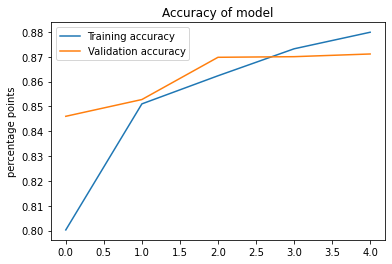

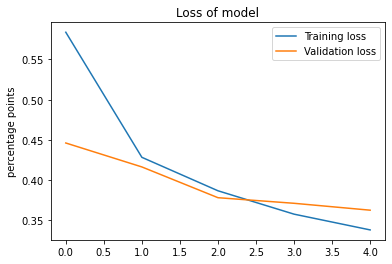

313/313 [==============================] - 1s 2ms/step - loss: 0.3837 - accuracy: 0.8623
Accuracy of model on test data:  0.86


In [5]:
model = tf.keras.models.Sequential([
         tf.keras.layers.Flatten(input_shape = [X_train.shape[1], X_train.shape[2]]),
         tf.keras.layers.Dense(units = 128,
                               activation = tf.nn.relu),
         tf.keras.layers.Dense(units = len(np.unique(y_train)),
                               activation = tf.nn.softmax)
])

print(model.summary())

model.compile(
             loss = 'sparse_categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ['accuracy'])

history = model.fit(x = X_train,
                    y = y_train,
                    epochs = 5,
                    validation_split = 0.2,
                    batch_size = 128)

plot_graphs(history)

loss, accuracy = model.evaluate(x = X_test,
               y = y_test)

print('Accuracy of model on test data: ', round(accuracy, 2))

### Reshaping the data for convolutions

In [6]:
mnst_data = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnst_data.load_data()
X_train = X_train.reshape(X_train.shape[0],
                          X_train.shape[1],
                          X_train.shape[2],
                          1)
X_test = X_test.reshape(X_test.shape[0],
                        X_test.shape[1],
                        X_test.shape[2],
                        1)
print('Training input data shape: ', X_train.shape)
print('Training label data shape: ', y_train.shape)
print('Testing input data shape: ', X_test.shape)
print('Training label data shape: ', y_test.shape)

X_train = X_train / 255
X_test = X_test / 255

Training input data shape:  (60000, 28, 28, 1)
Training label data shape:  (60000,)
Testing input data shape:  (10000, 28, 28, 1)
Training label data shape:  (10000,)


### Convolution_neural_network

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

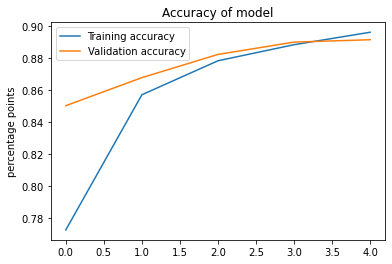

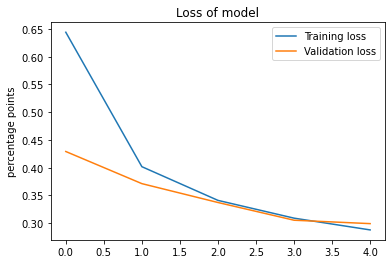

313/313 [==============================] - 2s 7ms/step - loss: 0.3169 - accuracy: 0.8872
Accuracy of model on test data:  0.89


In [8]:
model = tf.keras.models.Sequential([
         tf.keras.layers.Conv2D(filters = 32,
                                kernel_size = (3,3),
                                activation = 'relu',
                                input_shape = (X_train.shape[1], X_train.shape[2], 1)),
         tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    
        tf.keras.layers.Conv2D(filters = 64,
                                kernel_size = (3,3),
                                activation = 'relu',
                                input_shape = (X_train.shape[1], X_train.shape[2], 1)),
         tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    
         tf.keras.layers.Flatten(),
         tf.keras.layers.Dense(units = 128,
                               activation = tf.nn.relu),
         tf.keras.layers.Dense(units = len(np.unique(y_train)),
                               activation = tf.nn.softmax)
])

print(model.summary())

model.compile(
             loss = 'sparse_categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ['accuracy'])

history = model.fit(x = X_train,
                    y = y_train,
                    epochs = 5,
                    validation_split = 0.1,
                    batch_size = 256)

plot_graphs(history)

loss, accuracy = model.evaluate(x = X_test,
               y = y_test)

print('Accuracy of model on test data: ', round(accuracy, 2))

### Experimenting with the number of filters
* With the increase in the number of filters in convolution layers, the processing time has increased and accuracy has increased as compared to less filters.
* For test accuracy, almost 1 percentage increase is observed

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               409728    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

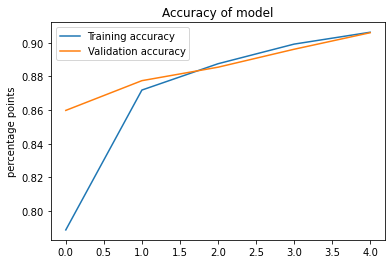

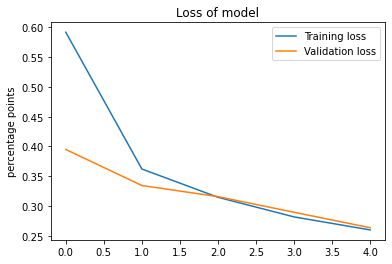

313/313 [==============================] - 4s 12ms/step - loss: 0.2839 - accuracy: 0.8997
Accuracy of model on test data:  0.9


In [9]:
model = tf.keras.models.Sequential([
         tf.keras.layers.Conv2D(filters = 64,
                                kernel_size = (3,3),
                                activation = 'relu',
                                input_shape = (X_train.shape[1], X_train.shape[2], 1)),
         tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    
        tf.keras.layers.Conv2D(filters = 128,
                                kernel_size = (3,3),
                                activation = 'relu',
                                input_shape = (X_train.shape[1], X_train.shape[2], 1)),
         tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    
         tf.keras.layers.Flatten(),
         tf.keras.layers.Dense(units = 128,
                               activation = tf.nn.relu),
         tf.keras.layers.Dense(units = len(np.unique(y_train)),
                               activation = tf.nn.softmax)
])

print(model.summary())

model.compile(
             loss = 'sparse_categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ['accuracy'])

history = model.fit(x = X_train,
                    y = y_train,
                    epochs = 5,
                    validation_split = 0.1,
                    batch_size = 256)

plot_graphs(history)

loss, accuracy = model.evaluate(x = X_test,
               y = y_test)

print('Accuracy of model on test data: ', round(accuracy, 2))

### Reduction in number of convolution layers
* In the above examples, we have two convolution layers, now we will reduce it to single layer and check its performance
* The processing time is reduced slightly and the accuracy on the test data has increased by 2 percentage points, when compared to two layers of convolution layers

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               1384576   
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
211/211 [==============================] - 27s 126ms/step - loss: 0.5104 - accuracy: 0.8214 - v

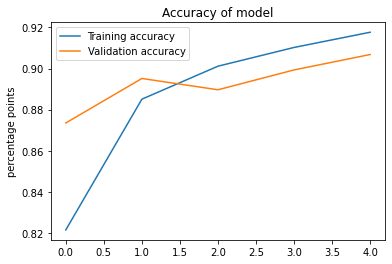

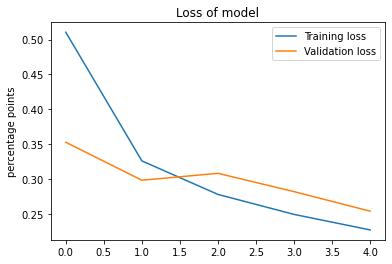

313/313 [==============================] - 2s 7ms/step - loss: 0.2673 - accuracy: 0.9018
Accuracy of model on test data:  0.9


In [10]:
model = tf.keras.models.Sequential([
         tf.keras.layers.Conv2D(filters = 64,
                                kernel_size = (3,3),
                                activation = 'relu',
                                input_shape = (X_train.shape[1], X_train.shape[2], 1)),
         tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        
         tf.keras.layers.Flatten(),
         tf.keras.layers.Dense(units = 128,
                               activation = tf.nn.relu),
         tf.keras.layers.Dense(units = len(np.unique(y_train)),
                               activation = tf.nn.softmax)
])

print(model.summary())

model.compile(
             loss = 'sparse_categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ['accuracy'])

history = model.fit(x = X_train,
                    y = y_train,
                    epochs = 5,
                    validation_split = 0.1,
                    batch_size = 256)

plot_graphs(history)

loss, accuracy = model.evaluate(x = X_test,
               y = y_test)

print('Accuracy of model on test data: ', round(accuracy, 2))

### Increase in the number of convolution layers
* It is observed that the accuracy is slightly reduced with the increase in the number of convolution layers

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 128)         147584    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 128)              

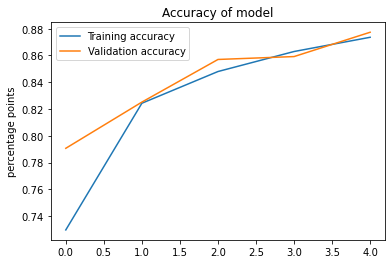

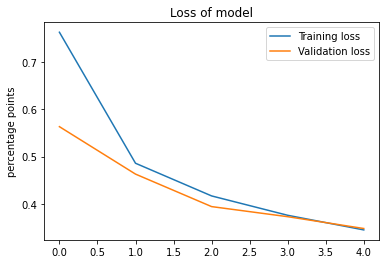

313/313 [==============================] - 4s 12ms/step - loss: 0.3665 - accuracy: 0.8662
Accuracy of model on test data:  0.87


In [11]:
model = tf.keras.models.Sequential([
         tf.keras.layers.Conv2D(filters = 64,
                                kernel_size = (3,3),
                                activation = 'relu',
                                input_shape = (X_train.shape[1], X_train.shape[2], 1)),
         tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    
        tf.keras.layers.Conv2D(filters = 128,
                                kernel_size = (3,3),
                                activation = 'relu',
                                input_shape = (X_train.shape[1], X_train.shape[2], 1)),
         tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

        tf.keras.layers.Conv2D(filters = 128,
                                kernel_size = (3,3),
                                activation = 'relu',
                                input_shape = (X_train.shape[1], X_train.shape[2], 1)),
         tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    
         tf.keras.layers.Flatten(),
         tf.keras.layers.Dense(units = 128,
                               activation = tf.nn.relu),
         tf.keras.layers.Dense(units = len(np.unique(y_train)),
                               activation = tf.nn.softmax)
])

print(model.summary())

model.compile(
             loss = 'sparse_categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ['accuracy'])

history = model.fit(x = X_train,
                    y = y_train,
                    epochs = 5,
                    validation_split = 0.1,
                    batch_size = 256)

plot_graphs(history)

loss, accuracy = model.evaluate(x = X_test,
               y = y_test)

print('Accuracy of model on test data: ', round(accuracy, 2))